<a href="https://colab.research.google.com/github/AdrikaPanwar/Practice-Projects/blob/main/Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/13e0NHRAJLO3SYXorYEbtiHzKfOY7YfacnEp2Phg1h1c#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [56]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [57]:
df.shape

(1338, 7)

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
print(f'age: {df.age.count()}')
print(f'age: {df.sex.count()}')  # you can do it like that etc :)

age: 1338
age: 1338


In [60]:
print(f'age: {df.age.nunique()}')
print(f'age: {df.sex.nunique()}')

age: 47
age: 2


In [61]:
import pandas as pd, numpy as np, statsmodels.api as sm

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.head()

label = "charges"

y = df.charges
X = df[['age', 'bmi', 'children']].assign(cont=1)

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

df['predictions'] = results.fittedvalues
df

df = pd.get_dummies(df, columns=['sex'], prefix='sex', drop_first=True)
df = pd.get_dummies(df, columns=['smoker'], prefix='smoker', drop_first=True)
df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)
df.head()


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           8.80e-37
Time:                        19:22:22   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,6908.777533,False,True,False,False,True
1,18,33.770,1,1725.55230,9160.977061,True,False,False,True,False
2,28,33.000,3,4449.46200,12390.946918,True,False,False,True,False
3,33,22.705,0,21984.47061,8543.527095,True,False,True,False,False
4,32,28.880,0,3866.85520,10354.147396,True,False,True,False,False


In [62]:
print(results.predict([19, 27.9, 0, 1]))

[6908.77753344]


In [63]:
from sklearn import preprocessing
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns)
df_zscore.head()

Y = df_zscore['charges']
X = df_zscore.drop(columns=['predictions', 'charges']).assign(cont=1)

results = sm.OLS(Y,X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:22:22   Log-Likelihood:                -968.66
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.2980      0.014  

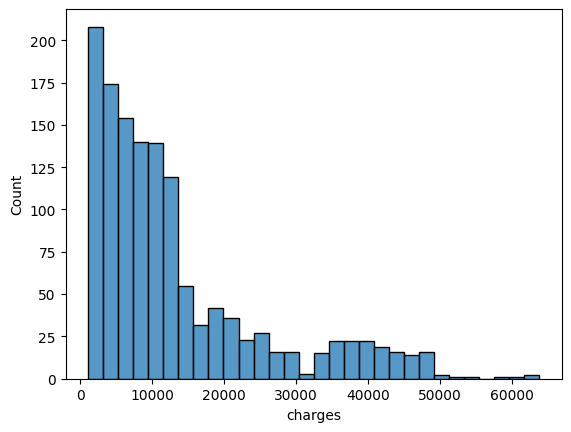

In [64]:
import seaborn as sns
sns.histplot(y);

<Axes: xlabel='charges', ylabel='Count'>

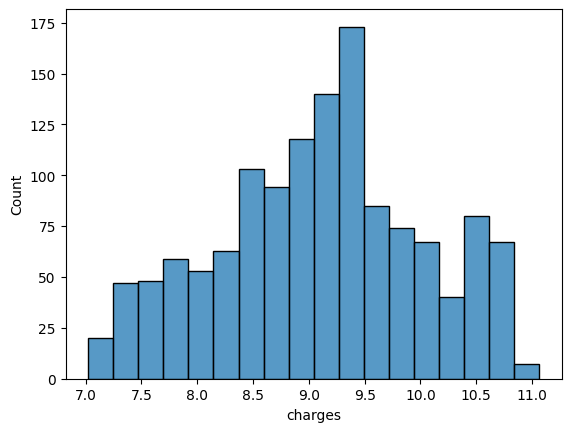

In [65]:
y = np.log1p(y)
sns.histplot(y)